# Welcome to my notebook..

Geospatial Clustering Notebook sample :) 

In [2]:
import numpy as np
import pandas as pd

Let's retrieve OpenStreetMap (OSM)Data by specifying the places for data to be downloaded.

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Mumbai, Maharashtra, India"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Wooh !! We found something new. A new DataFormat Multidigraph. So,A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate shortest paths along road networks also.

     Let's look at streets of Mumbai now..

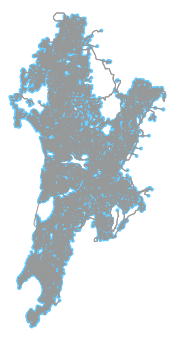

In [4]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Woahh !! Now there exists nodes (blue circles)in the graph and the edges (gray lines) that connects those nodes to each other.

It is also possible to retrieve other types of OSM data features with osmnx such as buildings or points of interest (POIs).

Cool, now let's download and see the buildings in Mumbai..

In [5]:
# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)

# Retrieve buildings from the area
buildings = ox.footprints_from_place(place_name)

# What types are those?
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


Great !! Now, we have GeoDataFrame and OSmnx comes up with a surprise. We can extract the POI Data from openstreetmap using overpy by using a simple function of OSmnx i.e.pois_from_place. Let's do it !!

In [6]:
#Retrieve restaurants, cafe, ...etc.
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])
cafe = ox.pois_from_place(place_name, amenities=['cafe'])
drinking_water = ox.pois_from_place(place_name, amenities=['drinking_water'])
food_court = ox.pois_from_place(place_name, amenities=['food_court'])
college = ox.pois_from_place(place_name, amenities=['college'])
university = ox.pois_from_place(place_name, amenities=['university'])
bus_station = ox.pois_from_place(place_name, amenities=['bus_station'])
parking = ox.pois_from_place(place_name, amenities=['parking'])
bank = ox.pois_from_place(place_name, amenities=['bank'])
hospital = ox.pois_from_place(place_name, amenities=['hospital'])
cinema = ox.pois_from_place(place_name, amenities=['cinema'])
community_centre = ox.pois_from_place(place_name, amenities=['community_centre'])
bench = ox.pois_from_place(place_name, amenities=['bench'])
marketplace = ox.pois_from_place(place_name, amenities=['marketplace'])
toilets = ox.pois_from_place(place_name, amenities=['toilets'])
kindergarten = ox.pois_from_place(place_name, amenities=['kindergarten'])

In [7]:
# How many restaurants do we have?
len(restaurants)

489

WOW , NEVER Mind I am not going to use it. I just wanted to know this :).. Lets' move ahead guys
    Now , I am just going to join the dataframes into one wih different labels for amenities so that I could Cluster them Later. I am performing Univariate Clustering only..

In [8]:
# Concatenating the geodataframes
df=pd.concat([restaurants,cafe,drinking_water,food_court,college,university,bus_station,parking,bank,hospital,cinema,community_centre,bench,marketplace,toilets,kindergarten],sort=True)

In [9]:
df.head()

,AND_a_nosr_p,Guard_type,access,addr:city,addr:country,addr:district,addr:full,addr:housename,addr:housenumber,addr:neighbourhood,...,unisex,url,visibility,ways,website,wheelchair,wifi,wikidata,wikipedia,wpt_symbol
245653876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347145411,NaN,NaN,NaN,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347168982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347168988,NaN,NaN,NaN,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459667350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df)

2212

In [11]:
# Available columns
df.columns

Index(['AND_a_nosr_p', 'Guard_type', 'access', 'addr:city', 'addr:country',
       'addr:district', 'addr:full', 'addr:housename', 'addr:housenumber',
       'addr:neighbourhood',
       ...
       'unisex', 'url', 'visibility', 'ways', 'website', 'wheelchair', 'wifi',
       'wikidata', 'wikipedia', 'wpt_symbol'],
      dtype='object', length=139)

In [12]:
#  Extracting the index values because it represents the osmid
index=df.index.values.tolist()

In [13]:
len(index)

2212

In [14]:
df_index=pd.DataFrame({'osmid':index})

In [15]:
df_index.head()

,osmid
0,245653876
1,347145411
2,347168982
3,347168988
4,459667350


In [16]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
                     y          x       osmid highway  \
2248802304  19.054356  72.933472  2248802304     NaN   
2248802313  19.054384  72.937489  2248802313     NaN   
6136332304  19.017702  72.872799  6136332304     NaN   
1351352338  19.224646  72.844702  1351352338     NaN   
2248802324  19.054576  72.924349  2248802324     NaN   

                             geometry  
2248802304  POINT (72.93347 19.05436)  
2248802313  POINT (72.93749 19.05438)  
6136332304  POINT (72.87280 19.01770)  
1351352338  POINT (72.84470 19.22465)  
2248802324  POINT (72.92435 19.05458)   

Edges:
             u           v  key      osmid      highway  oneway   length  \
0  2248802304  2248802330    0  215438684  residential   False   66.863   
1  2248802313  2248802342    0  215438630  residential   False  101.674   
2  6136332304  4292746859    0  289412579      primary    True  278.650   
3  1351352338  1351352355    0  120529599  residential   False   78.079   
4  1351352338  6581177024    0

Here's a thing, I want to know how the individual amenities are ditributed over Mumbai before I cluster them into commercial centres..

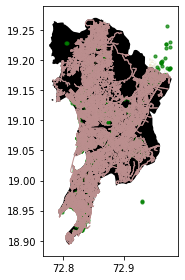

In [17]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

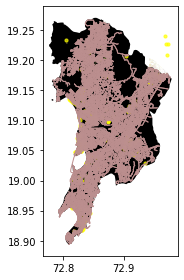

In [18]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot cafe
cafe.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

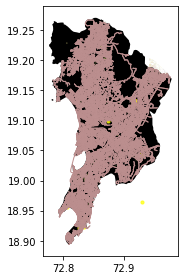

In [19]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot drinking_water
drinking_water.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

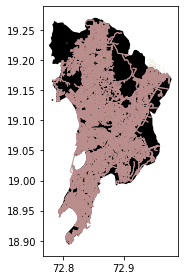

In [20]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot food court
food_court.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

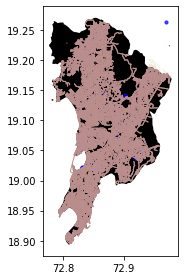

In [21]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot colleges
college.plot(ax=ax, color='blue', alpha=0.7, markersize=10)
plt.tight_layout()

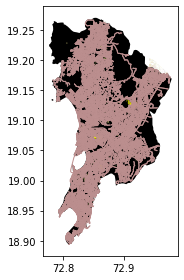

In [22]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot universities
university.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

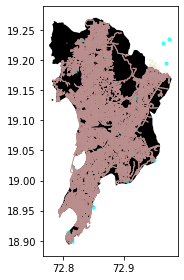

In [23]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bus stations
bus_station.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

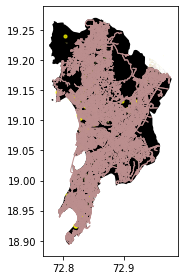

In [24]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot parking
parking.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

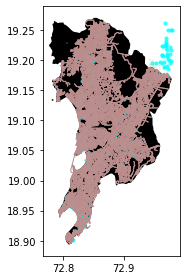

In [25]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bank
bank.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

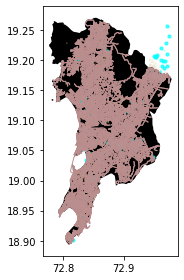

In [26]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot hospital
hospital.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

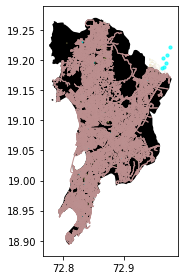

In [27]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot cinema
cinema.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

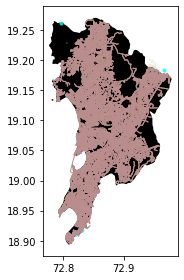

In [28]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot community centre
community_centre.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

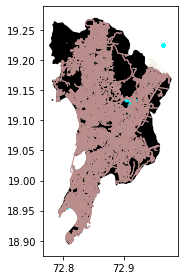

In [29]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bench
bench.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

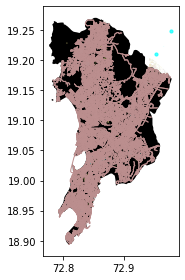

In [30]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot marketplace
marketplace.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

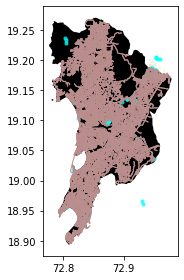

In [31]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot toilets
toilets.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

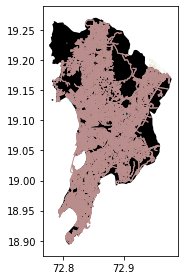

In [32]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot kindergarten
kindergarten.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

Whooossh, this is a whole lot of data to move around. Let's reduce it and consider only primary features for instance.

In [33]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'amenity','geometry', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

In [34]:
# Print and take only this data columns
df1=df[cols]

Let's get the Latitude and Longitudes !!

In [35]:
# Fetching restaurants data
data_osm = ox.pois.osm_poi_download(polygon=None, amenities=['restaurants'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df1 = pd.DataFrame(data_osm['elements'])
df1['tags'] = 'restaurants'
df1.head()

,tags


In [36]:
# Fetching cafe data
data_osm2 = ox.pois.osm_poi_download(polygon=None, amenities=['cafe'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df2 = pd.DataFrame(data_osm2['elements'])
df2['tags'] = 'cafe'
df2.head()

,type,id,lat,lon,tags,nodes
0,node,347145587,19.054624,72.826472,cafe,NaN
1,node,496816401,18.916666,72.817689,cafe,NaN
2,node,593863031,19.207513,72.904388,cafe,NaN
3,node,669259659,18.923943,72.832165,cafe,NaN
4,node,1070186383,19.232706,72.805184,cafe,NaN


In [37]:
# Fetching cafe data
data_osm3 = ox.pois.osm_poi_download(polygon=None, amenities=['drinking_water'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df3 = pd.DataFrame(data_osm3['elements'])
df3['tags'] = 'drinking_water'
df3.head()

,type,id,lat,lon,tags
0,node,1074947838,19.235291,73.131602,drinking_water
1,node,1641813917,19.071966,72.824292,drinking_water
2,node,2189176391,18.933166,72.831568,drinking_water
3,node,2568650320,19.042476,72.927289,drinking_water
4,node,2568659863,19.042020,72.928317,drinking_water


In [38]:
# Fetching cafe data
data_osm4 = ox.pois.osm_poi_download(polygon=None, amenities=['food_court'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df4 = pd.DataFrame(data_osm4['elements'])
df4['tags'] = 'food_court'
df4.head()

,type,id,lat,lon,tags
0,node,5556204972,19.026103,73.024879,food_court
1,node,6024106796,19.119865,72.873215,food_court


In [39]:
# Fetching cafe data
data_osm5 = ox.pois.osm_poi_download(polygon=None, amenities=['college'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df5 = pd.DataFrame(data_osm5['elements'])
df5['tags'] = 'college'
df5.head()

,type,id,lat,lon,tags,nodes,members
0,node,245675222,19.141225,72.902133,college,NaN,NaN
1,node,296859201,19.044622,72.820316,college,NaN,NaN
2,node,296859202,19.044254,72.820243,college,NaN,NaN
3,node,296859203,19.043817,72.820774,college,NaN,NaN
4,node,296859204,19.043786,72.820834,college,NaN,NaN


In [40]:
# Fetching cafe data
data_osm6 = ox.pois.osm_poi_download(polygon=None, amenities=['university'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df6 = pd.DataFrame(data_osm6['elements'])
df6['tags'] = 'university'
df6.head()

,type,id,lat,lon,tags,nodes,members
0,node,296848926,19.131646,72.816164,university,NaN,NaN
1,node,296848927,19.132018,72.816999,university,NaN,NaN
2,node,296848929,19.131460,72.817102,university,NaN,NaN
3,node,296848931,19.131184,72.816550,university,NaN,NaN
4,node,593867828,19.123848,72.908645,university,NaN,NaN


In [41]:
# Fetching cafe data
data_osm7 = ox.pois.osm_poi_download(polygon=None, amenities=['bus_station'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df7 = pd.DataFrame(data_osm7['elements'])
df7['tags'] = 'bus_station'
df7.head()

,type,id,lat,lon,tags,nodes
0,node,338558664,19.168732,73.236508,bus_station,NaN
1,node,338558666,19.168470,73.236721,bus_station,NaN
2,node,338558667,19.168823,73.237088,bus_station,NaN
3,node,338558668,19.169063,73.236862,bus_station,NaN
4,node,352378593,19.228128,73.148628,bus_station,NaN


In [42]:
# Fetching cafe data
data_osm8 = ox.pois.osm_poi_download(polygon=None, amenities=['parking'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df8 = pd.DataFrame(data_osm8['elements'])
df8['tags'] = 'parking'
df8.head()

,type,id,lat,lon,tags,nodes
0,node,245654537,18.942228,72.827293,parking,NaN
1,node,245654550,18.942400,72.826900,parking,NaN
2,node,245655797,18.956702,72.836902,parking,NaN
3,node,245656700,18.964323,72.805847,parking,NaN
4,node,245657615,18.973354,72.844846,parking,NaN


In [43]:
# Fetching cafe data
data_osm9 = ox.pois.osm_poi_download(polygon=None, amenities=['bank'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df9 = pd.DataFrame(data_osm9['elements'])
df9['tags'] = 'bank'
df9.head()

,type,id,lat,lon,tags,nodes
0,node,338565634,19.158876,73.242121,bank,NaN
1,node,338565637,19.158665,73.242301,bank,NaN
2,node,338565638,19.158844,73.242473,bank,NaN
3,node,338565639,19.159014,73.242327,bank,NaN
4,node,339122585,19.158861,73.242299,bank,NaN


In [44]:
# Fetching cafe data
data_osm10 = ox.pois.osm_poi_download(polygon=None, amenities=['hospital'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df10 = pd.DataFrame(data_osm10['elements'])
df10['tags'] = 'hospital'
df10.head()

,type,id,lat,lon,tags,nodes,members
0,node,245659703,19.004324,72.845229,hospital,NaN,NaN
1,node,245660950,19.019062,72.857521,hospital,NaN,NaN
2,node,245662472,19.033619,72.838716,hospital,NaN,NaN
3,node,245662477,19.033686,72.838159,hospital,NaN,NaN
4,node,245665571,19.061144,72.893607,hospital,NaN,NaN


In [45]:
# Fetching cafe data
data_osm11 = ox.pois.osm_poi_download(polygon=None, amenities=['cinema'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df11 = pd.DataFrame(data_osm11['elements'])
df11['tags'] = 'cinema'
df11.head()

,type,id,lat,lon,tags,nodes
0,node,339127604,19.167402,73.239238,cinema,NaN
1,node,597251914,18.941380,72.827372,cinema,NaN
2,node,597251920,18.941258,72.827033,cinema,NaN
3,node,597261815,18.941834,72.827184,cinema,NaN
4,node,597261816,18.941706,72.826851,cinema,NaN


In [46]:
# Fetching cafe data
data_osm12 = ox.pois.osm_poi_download(polygon=None, amenities=['community_centre'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df12 = pd.DataFrame(data_osm12['elements'])
df12['tags'] = 'community_centre'
df12.head()

,type,id,lat,lon,tags,nodes
0,node,1145116875,19.172273,72.849863,community_centre,NaN
1,node,1145116882,19.172113,72.849851,community_centre,NaN
2,node,1145116884,19.172098,72.849621,community_centre,NaN
3,node,1145116886,19.172244,72.849621,community_centre,NaN
4,node,1160826434,19.164809,72.854030,community_centre,NaN


In [47]:
# Fetching cafe data
data_osm13 = ox.pois.osm_poi_download(polygon=None, amenities=['bench'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df13 = pd.DataFrame(data_osm13['elements'])
df13['tags'] = 'bench'
df13.head()

,type,id,lat,lon,tags
0,node,654013728,19.174870,73.237326,bench
1,node,654014031,19.174566,73.235116,bench
2,node,654014053,19.174018,73.234955,bench
3,node,654014082,19.171353,73.234730,bench
4,node,678254678,19.162933,73.228181,bench


In [48]:
# Fetching cafe data
data_osm14 = ox.pois.osm_poi_download(polygon=None, amenities=['marketplace'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df14 = pd.DataFrame(data_osm14['elements'])
df14['tags'] = 'marketplace'
df14.head()

,type,id,lat,lon,tags,nodes,members
0,node,610244320,18.960791,72.818260,marketplace,NaN,NaN
1,node,610244321,18.961605,72.818594,marketplace,NaN,NaN
2,node,610244322,18.961550,72.818726,marketplace,NaN,NaN
3,node,610244323,18.960737,72.818392,marketplace,NaN,NaN
4,node,619090075,19.087050,73.010947,marketplace,NaN,NaN


In [49]:
# Fetching cafe data
data_osm15 = ox.pois.osm_poi_download(polygon=None, amenities=['toilets'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df15 = pd.DataFrame(data_osm15['elements'])
df15['tags'] = 'toilets'
df15.head()

,type,id,lat,lon,tags,nodes
0,node,348129744,19.051983,72.824671,toilets,NaN
1,node,459626234,18.958580,72.800338,toilets,NaN
2,node,469125308,18.957930,72.802596,toilets,NaN
3,node,477616673,18.961430,72.812914,toilets,NaN
4,node,619218674,18.964223,72.813153,toilets,NaN


In [50]:
# Fetching cafe data
data_osm16 = ox.pois.osm_poi_download(polygon=None, amenities=['kindergarten'], north=19.3319, south=18.8316, east=73.2520, west=72.5036, timeout=180, max_query_area_size=2500000000)
df16 = pd.DataFrame(data_osm16['elements'])
df16['tags'] = 'kindergarten'
df16.head()

,type,id,lat,lon,tags,nodes
0,node,1345329154,19.110354,72.852271,kindergarten,NaN
1,node,1736289563,18.917456,72.826514,kindergarten,NaN
2,node,2562633576,19.176005,72.873012,kindergarten,NaN
3,node,2933886273,19.044335,72.931177,kindergarten,NaN
4,node,2933886274,19.044210,72.931558,kindergarten,NaN


In [51]:
df_test = pd.concat([df2,df3, df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16], axis=0)

/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [52]:
df_test['tags'].nunique()

15

In [53]:
df_test.head(10)

,id,lat,lon,members,nodes,tags,type
0,347145587,19.054624,72.826472,NaN,NaN,cafe,node
1,496816401,18.916666,72.817689,NaN,NaN,cafe,node
2,593863031,19.207513,72.904388,NaN,NaN,cafe,node
3,669259659,18.923943,72.832165,NaN,NaN,cafe,node
4,1070186383,19.232706,72.805184,NaN,NaN,cafe,node
5,1332567346,18.930465,72.826474,NaN,NaN,cafe,node
6,1416515413,19.214285,72.840128,NaN,NaN,cafe,node
7,1575245771,19.102997,72.846519,NaN,NaN,cafe,node
8,1579291348,19.103666,72.852176,NaN,NaN,cafe,node
9,1581145453,19.257836,72.982588,NaN,NaN,cafe,node


In [54]:
df_test=df_test.drop(df_test.columns[3], axis=1)

In [55]:
df_test.head()

,id,lat,lon,nodes,tags,type
0,347145587,19.054624,72.826472,NaN,cafe,node
1,496816401,18.916666,72.817689,NaN,cafe,node
2,593863031,19.207513,72.904388,NaN,cafe,node
3,669259659,18.923943,72.832165,NaN,cafe,node
4,1070186383,19.232706,72.805184,NaN,cafe,node


In [56]:
df_test=df_test.drop(df_test.columns[3], axis=1)

In [57]:
df_test.head()

,id,lat,lon,tags,type
0,347145587,19.054624,72.826472,cafe,node
1,496816401,18.916666,72.817689,cafe,node
2,593863031,19.207513,72.904388,cafe,node
3,669259659,18.923943,72.832165,cafe,node
4,1070186383,19.232706,72.805184,cafe,node


In [58]:
df_test=df_test.drop(df_test.columns[4], axis=1)

In [59]:
df_test.head()

,id,lat,lon,tags
0,347145587,19.054624,72.826472,cafe
1,496816401,18.916666,72.817689,cafe
2,593863031,19.207513,72.904388,cafe
3,669259659,18.923943,72.832165,cafe
4,1070186383,19.232706,72.805184,cafe


In [60]:
df_test.to_csv('Geo_Data.csv',index=False)

In [61]:
df_test.head(10)

,id,lat,lon,tags
0,347145587,19.054624,72.826472,cafe
1,496816401,18.916666,72.817689,cafe
2,593863031,19.207513,72.904388,cafe
3,669259659,18.923943,72.832165,cafe
4,1070186383,19.232706,72.805184,cafe
5,1332567346,18.930465,72.826474,cafe
6,1416515413,19.214285,72.840128,cafe
7,1575245771,19.102997,72.846519,cafe
8,1579291348,19.103666,72.852176,cafe
9,1581145453,19.257836,72.982588,cafe


We have data for different 'amenities' but they are in label form and before clustering it we need to Labelencode them

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Need to convert categorical data into string format

Okay, now we have the LabelEncoded Data. Focus on amenity and Geometry only as of now..

In [64]:
df_test['lat'].fillna(df_test['lat'].mean(), inplace=True)

In [65]:
df_test['lon'].fillna(df_test['lon'].mean(), inplace=True)

# Clustering using geopandas

In [73]:
%matplotlib inline
import pandas as pd
import geopandas

pd.options.display.max_rows=10

# Performing Clustering using K means

In [74]:
df_target = df_test

In [75]:
#!pip install folium

In [76]:
#import folium
#from folium import plugins
#from folium.plugins import MarkerCluster

In [77]:
#initiating the map with coordinates of nearby location to our data
#mm = folium.Map([ 28.183180, 76.612228], zoom_start=4.4)  # nearby location coordinates initially


In [78]:
#Adding circular markers to map
#for index, row in df_target.iterrows():
#    folium.CircleMarker([row['lat'], row['lon']],
#                        radius=8,
#                        popup=row['tags'],
#                        fill_color="r", # divvy color,
#                       ).add_to(mm)
   
#plotting the data points on map
#mm

In [79]:
#mm.save("map_circular_marker.html")

In [80]:
#Setting the Map to show the data points in circular markers

#for index, row in df_target.iterrows():
#  folium.CircleMarker(location=(row['lon'], row['lat']),
#                        radius= 10,
#                                popup=row['tags'], color='r',
#                       fill_color='r').add_to(mm)
#mm

In [81]:
# Label Encoding the amenity types
labelencoder = LabelEncoder()
labelencoder.fit(df_target.iloc[:,3].values)
df_target.iloc[:,3]=labelencoder.transform(df_target.iloc[:,3])

In [82]:
df_target.head()

,id,lat,lon,tags
0,347145587,19.054624,72.826472,3
1,496816401,18.916666,72.817689,3
2,593863031,19.207513,72.904388,3
3,669259659,18.923943,72.832165,3
4,1070186383,19.232706,72.805184,3


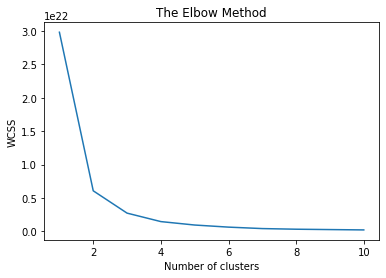

In [83]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,n_init=10,random_state=0)
    kmeans.fit(df_target)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [84]:
# Let n_cluster be 6 , though we should take 4
kmeans = KMeans(n_clusters = 4, max_iter=100000,n_init=10,init = 'k-means++', random_state = 42)
prediction_val = kmeans.fit_predict(df_target.values)
#dropping the predicted value into the column name cluster
df_target['cluster']=prediction_val

In [85]:
cent = kmeans.cluster_centers_

In [86]:
#clust_labels = prediction_val
kmeans = pd.DataFrame(prediction_val)
df_target.insert((df_target.shape[1]),'kmeans',kmeans)

In [87]:
kmeans[0]

0       1
1       1
2       1
3       1
4       1
       ..
6746    2
6747    1
6748    1
6749    1
6750    1
Name: 0, Length: 6751, dtype: int32

In [89]:
from sklearn import metrics

In [93]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_target, kmeans[0]))

Silhouette Coefficient: 0.633


- Silhouette Coefficienttells us how similar an object is to its own cluster compared to other clusters.

# Higher Silhouette Coefficient is better

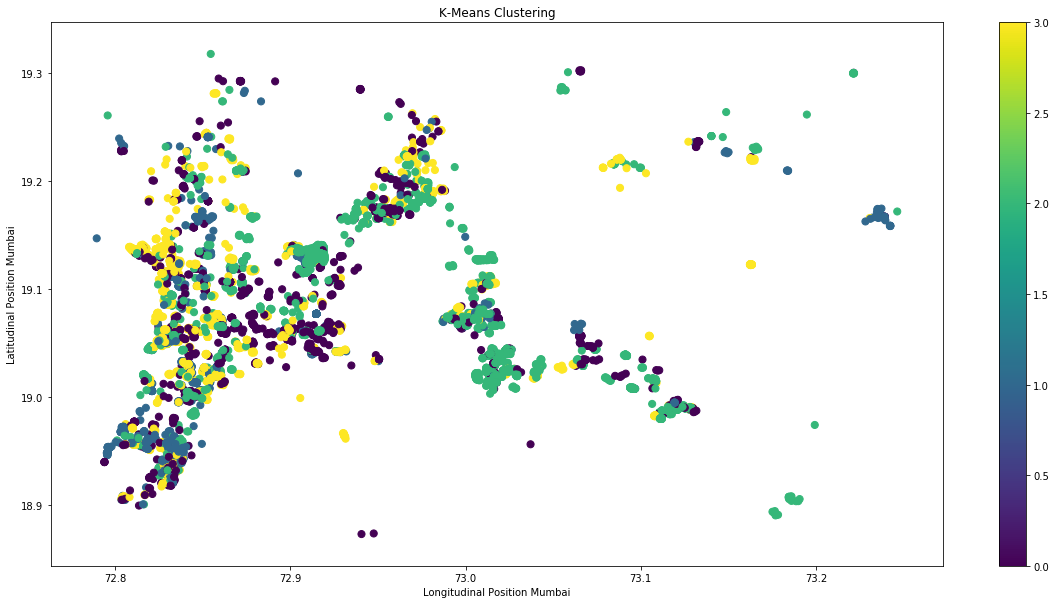

In [94]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_target['lon'],df_target['lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Longitudinal Position Mumbai')
ax.set_ylabel('Latitudinal Position Mumbai')
plt.colorbar(scatter)

In [95]:
ans = labelencoder.inverse_transform(prediction_val)

In [96]:
ans

array(['bench', 'bench', 'bench', ..., 'bench', 'bench', 'bench'],
      dtype=object)

In [97]:
final_df=pd.DataFrame({'id':df_target['id'].values,'lat':df_target['lat'].values,'lon':df_target['lon'].values,'tags':df_target['tags'].values,'cluster':ans})

In [98]:
final_df.head()

,id,lat,lon,tags,cluster
0,347145587,19.054624,72.826472,3,bench
1,496816401,18.916666,72.817689,3,bench
2,593863031,19.207513,72.904388,3,bench
3,669259659,18.923943,72.832165,3,bench
4,1070186383,19.232706,72.805184,3,bench


In [99]:
final_df.to_csv('knn_13Nov.csv',index=False)

In [100]:
#######################################################################################################################################

# Performing Clustering using DBSCAN

### Chosing tuned parameters

In [101]:
from sklearn.neighbors import NearestNeighbors

In [102]:
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [103]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_target) 

# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# Renaming the columns 
X_normalized.columns = df_target.columns 

X_normalized.head() 

,id,lat,lon,tags,cluster,kmeans
0,-0.660800,-0.134408,-0.461740,-0.456128,-0.253850,-0.244095
1,-0.456527,-0.692674,-0.369090,-0.331649,-0.184574,-0.177481
2,-0.532051,0.677561,-0.047981,-0.400120,-0.222680,-0.214122
3,-0.453276,-0.698805,-0.331923,-0.350462,-0.195044,-0.187548
4,-0.378004,0.694489,-0.431647,-0.343638,-0.191246,-0.183896


In [104]:
df_target = X_normalized

In [105]:
# choose columns
df_target = df_target[['id', 'lat', 'lon','tags']]
df_target.head(10)

,id,lat,lon,tags
0,-0.660800,-0.134408,-0.461740,-0.456128
1,-0.456527,-0.692674,-0.369090,-0.331649
2,-0.532051,0.677561,-0.047981,-0.400120
3,-0.453276,-0.698805,-0.331923,-0.350462
4,-0.378004,0.694489,-0.431647,-0.343638
5,-0.362455,-0.710841,-0.376905,-0.372335
6,-0.306522,0.585281,-0.281197,-0.328541
7,-0.351226,0.137116,-0.320988,-0.410107
8,-0.353249,0.141818,-0.296790,-0.413411
9,-0.253586,0.697484,0.230457,-0.297085


In [106]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_target)
distances, indices = nbrs.kneighbors(df_target)

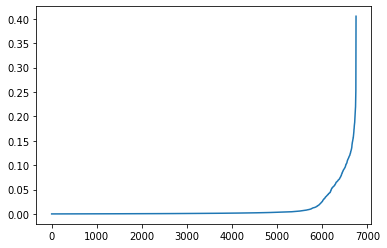

In [107]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

- The optimal value for epsilon will be found at the point of maximum curvature.

In [111]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_target
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=6).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_target['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_target[['Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Clus_Db
0       -1
1       -1
2       -1
3       -1
4       -1
number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,

/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [112]:
from sklearn import metrics

In [113]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_target, labels))

Silhouette Coefficient: 0.678


- Silhouette Coefficient is  0.645 with eps=0.025, and 0.678 with eps=0.05


### -1 stands for outlier 

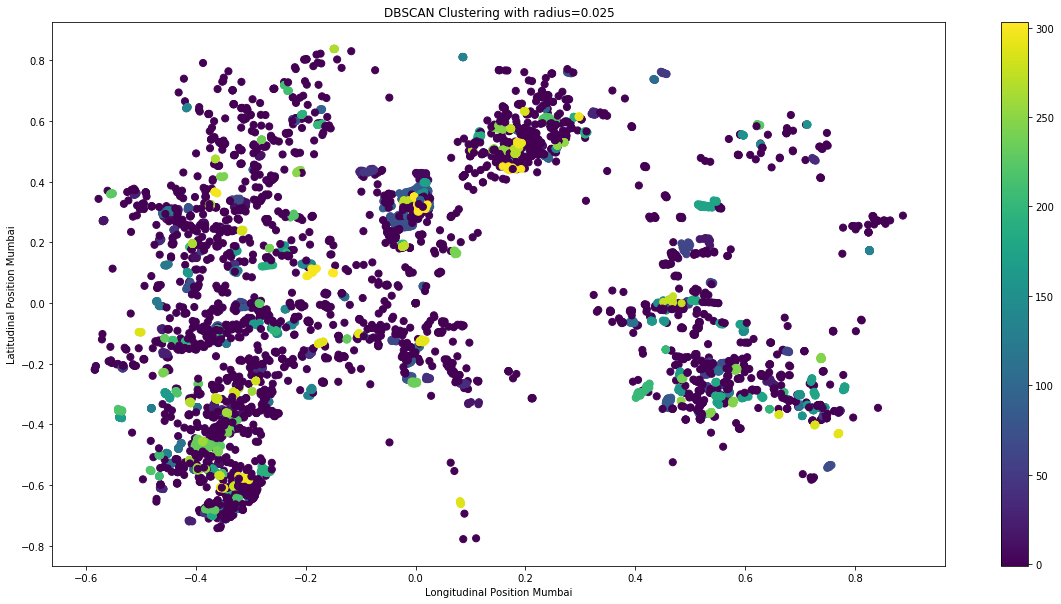

In [114]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_target['lon'],df_target['lat'],
                     c=labels,s=50)
ax.set_title('DBSCAN Clustering with radius=0.025')
ax.set_xlabel('Longitudinal Position Mumbai')
ax.set_ylabel('Latitudinal Position Mumbai')
plt.colorbar(scatter)

In [115]:
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True

In [123]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [124]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 304
Estimated number of noise points: 2655


In [125]:
#import matplotlib.pyplot as plt

In [126]:
# Black removed and is used for noise instead.
#unique_labels = set(labels)

In [127]:
#colors = [plt.cm.Spectral(each)
#          for each in np.linspace(0, 1, len(unique_labels))]

In [128]:
#mm

In [129]:
#ans1 = labelencoder.inverse_transform(labels)

In [130]:
#ans1

In [131]:
#final_df=pd.DataFrame({'id':df_target['id'].values,'lat':df_target['lat'].values,'lon':df_target['lon'].values,'tags':df_target['tags'].values,'cluster':ans})

In [132]:
#final_df.head()

In [133]:
#final_df.to_csv('DBSCAN_13Nov.csv',index=False)

In [134]:
###########################